## Importacion de librerias

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploramos el df

In [68]:
#Leemos el archivo games.csv
df = pd.read_csv("games.csv")

#Exploramos información general del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparacion de datos

In [69]:
#Verificamos si hay valores duplicados
datos_duplicados = df.duplicated().sum()
print(datos_duplicados)

0


In [70]:
#Verificamos si hay valores nulos
datos_nulos = df.isna().sum()
print(datos_nulos)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [71]:
#Convertimos las columnas en minuscula
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Trabajemos los valores de cada columna

En la columna name

In [72]:
#Rellenamos los valores ausentes
df["name"] = df["name"].fillna("nombres_desconocidos")

En la columna year_of_release

In [73]:
#revisamos valores ausentes y convertimos a valor entero
df["year_of_release"] = df["year_of_release"].fillna(0).astype(int)

En la columna genre

In [74]:

#Rellenamos los valores ausentes
df["genre"].fillna("genero_desconocido",inplace=True)

#Visualizamos los valores unicos en genre para verificar el reemplazo
print(df["genre"].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'
 'genero_desconocido']


/tmp/ipykernel_4982/87935869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genre"].fillna("genero_desconocido",inplace=True)


Trabajemos en las columnas critic_score, user_score y rating

In [75]:
#Rellenamos los valores ausentes en la columna critic_score
df["critic_score"].replace(0, np.nan, inplace=True)

/tmp/ipykernel_4982/47039780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["critic_score"].replace(0, np.nan, inplace=True)


In [76]:

#Rellenamos los valores ausentes en la columna user_score
df["user_score"].replace("tbd",np.nan,inplace=True)

#Visualizamos valores unicos en la columna user_score
print(df["user_score"].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


/tmp/ipykernel_4982/1485019928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["user_score"].replace("tbd",np.nan,inplace=True)


In [77]:
#convertimos los valores de la columna "user_score" a flotantes
df["user_score"] = df["user_score"].astype("float")

In [78]:
#Visualizamos valores unicos en la columna rating
print(df["rating"].unique())

#Reemplazamos valores ausentes NaN en la colimna rating
df["rating"].fillna("rating_desconocido",inplace=True)

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


/tmp/ipykernel_4982/4232523195.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna("rating_desconocido",inplace=True)


Imprimimos la informacion general del df para confirmar los cambios correctos

In [79]:
df.info()
datos_nulos = df.isna().sum()
print()
print(datos_nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score    

## Análisis de datos

 ### Juegos lanzados por años

In [80]:
#agrupamos los juegos lanzados por año
juegos_lanzados_por_año = df.groupby("year_of_release")["name"].count().reset_index()

#Renombramos las columnas necesarias
juegos_lanzados_por_año.rename(columns={'name': 'numero_juegos_por_año',"year_of_release":"año_lanzamiento"}, inplace=True)

#Eliminamos los juegos que no tienen informacion de lanzamiento.
juegos_lanzados_por_año.query("año_lanzamiento !=0",inplace=True)

print(juegos_lanzados_por_año)

    año_lanzamiento  numero_juegos_por_año
1              1980                      9
2              1981                     46
3              1982                     36
4              1983                     17
5              1984                     14
6              1985                     14
7              1986                     21
8              1987                     16
9              1988                     15
10             1989                     17
11             1990                     16
12             1991                     41
13             1992                     43
14             1993                     62
15             1994                    121
16             1995                    219
17             1996                    263
18             1997                    289
19             1998                    379
20             1999                    338
21             2000                    350
22             2001                    482
23         

Text(0, 0.5, 'Numero de juegos')

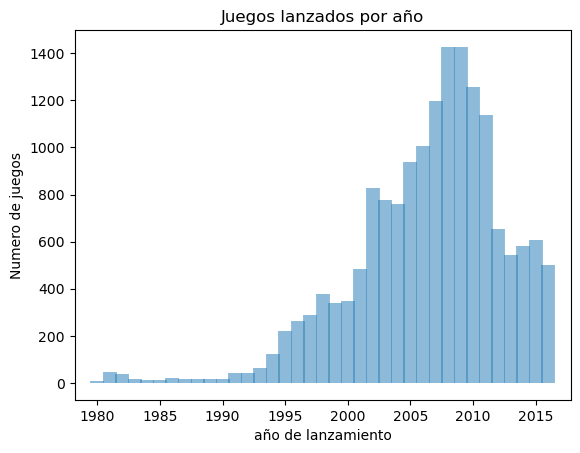

In [81]:
#Grafico de juegos lanzados por año.

plt.vlines(
    x=juegos_lanzados_por_año.año_lanzamiento,
    ymin=0,
    ymax=juegos_lanzados_por_año.numero_juegos_por_año,
    alpha=0.5,
    linewidth=10
    )
plt.title("Juegos lanzados por año")
plt.xlabel("año de lanzamiento")
plt.ylabel("Numero de juegos")

#### conclusion:
Del grafico se puede observar que a partir del año 2005 en adelante se comenzo a lanzar mayor numero de juegos, llegando al punto mas alto los años 2008 y 2009. A partir del año 2012 se ve que hay una tendencia ha disminuir el numero de juegos lanzados por año.

### Ventas por plataforma

#### Top 5 plataformas mejores ventas

In [128]:
#Creamos una columna con las ventas totales
df["total_sales"] = df[["na_sales","eu_sales","jp_sales" ,"other_sales"]].sum(axis=1)

#agrupamos los juegos lanzados por plataforma y sumamos sus ventas
ventas_por_plataforma = df.groupby("platform")["total_sales"].sum().reset_index()

#Ordenamos de mayor a menor
ventas_por_plataforma = ventas_por_plataforma.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
ventas_plataforma_top5 = ventas_por_plataforma.head(5)
#imprimimos las primeras 5 filas top
print(ventas_plataforma_top5)


  platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51
4       DS       806.12


#### Tiempo de vida de las plataformas


In [138]:
#Imprimimos las filas cuyo año sean mayores a 10
data_12 = df[df["year_of_release"] >= 2010]
print(data_12)

                                 name platform  year_of_release         genre  \
14                 Kinect Adventures!     X360             2010          Misc   
16                 Grand Theft Auto V      PS3             2013        Action   
23                 Grand Theft Auto V     X360             2013        Action   
27        Pokemon Black/Pokemon White       DS             2010  Role-Playing   
29     Call of Duty: Modern Warfare 3     X360             2011       Shooter   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV             2016     Adventure   
16707                Aiyoku no Eustia      PSV             2014          Misc   
16710   Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712         Haitaka no Psychedelica      PSV             2016     Adventure   
16714             Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  

In [136]:
#Creamos una tabla con las plataformas y las ventas
tiempo_vida12_plataforma = pd.pivot_table(
    data_12,
    index="year_of_release",
    columns="platform",
    values="total_sales",
    aggfunc="sum" 
).fillna(0)

#### Ventas por plataforma desde el 2010

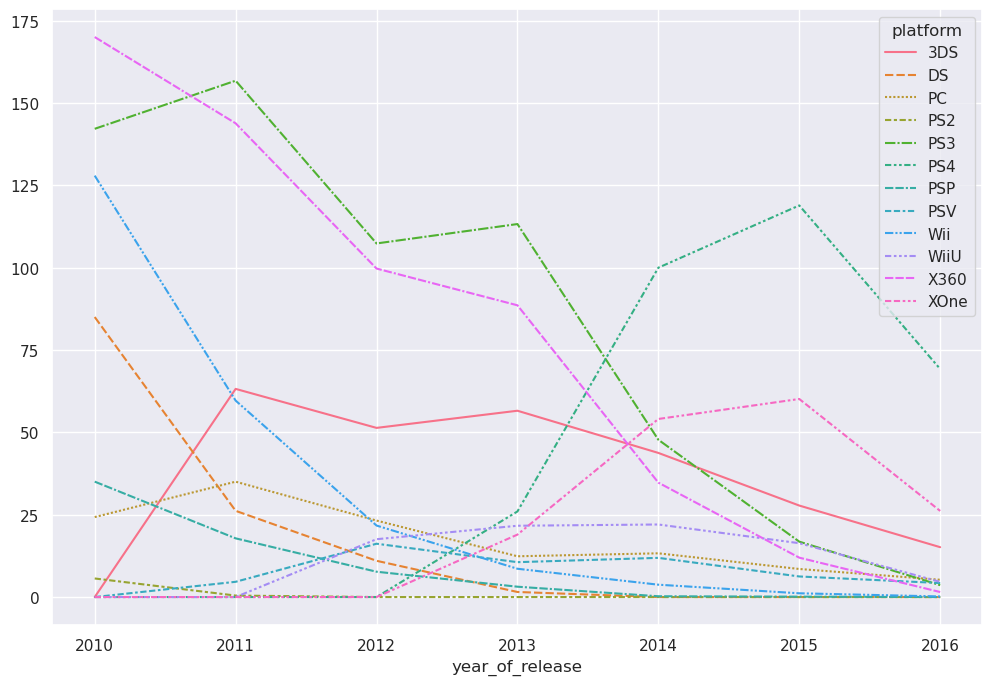

In [137]:
#Imprimos grafico para visualizar como se comporta la ventas por plataforma 

sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.lineplot(data=tiempo_vida12_plataforma)
plt.show()

#### Conclusiones:


Podemos visualizar del grafico que las plataformas se crean y a los 3 años en promedio logran llegar al tope de ventas y luego de 6 años aproximadamente de su creación llegan a su etapa final.

Se ha tomado los datos del 2010 hasta el 2016 para poder observar el comportamiento, ya que en estos años podemos observar como se va desarrollando la industria gaming de los ultimos años.

Las plataformas lideres que estuverion en crecimiento hasta el 2015 son: "PS4" y "XOne" y las que se reducen desde el 2011 son "PS3","X360" y "3DS".